Make classification with Linear regression with iris dataset from sklearn

In [56]:
#import module
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#dataframe module setup
irish = load_iris()

#features target split
dir(irish)
xtr, xte, ytr, yte = train_test_split(irish.data, irish.target, test_size=.3)

Do gridsearch directly, because datasets from sklearn ready to train in machine learning algorithm, so we dont need to clean it first

In [53]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2', "l1"]
c_values = [70, 100, 60, 50, 20, 30, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(irish.data, irish.target)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.980000 using {'C': 50, 'penalty': 'l2', 'solver': 'lbfgs'}
0.977778 (0.031427) with: {'C': 70, 'penalty': 'l2', 'solver': 'newton-cg'}
0.977778 (0.031427) with: {'C': 70, 'penalty': 'l2', 'solver': 'lbfgs'}
0.971111 (0.041036) with: {'C': 70, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 70, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 70, 'penalty': 'l1', 'solver': 'lbfgs'}
0.962222 (0.037251) with: {'C': 70, 'penalty': 'l1', 'solver': 'liblinear'}
0.977778 (0.031427) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.977778 (0.031427) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.968889 (0.041216) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.960000 (0.040734) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.977778 (0.031427) with: {'C':

c:\Users\hilla\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


make logistic regression algorithm and set best parameters tuning

In [57]:
#module
lrmulti = LogisticRegression(C=50, penalty="l2", solver="lbfgs", random_state=10)
lrmulti.fit(xtr, ytr)
lrmulti.predict(xte)
lrmulti.score(xte, yte)

c:\Users\hilla\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

Algorithm report - confussion matrix and classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



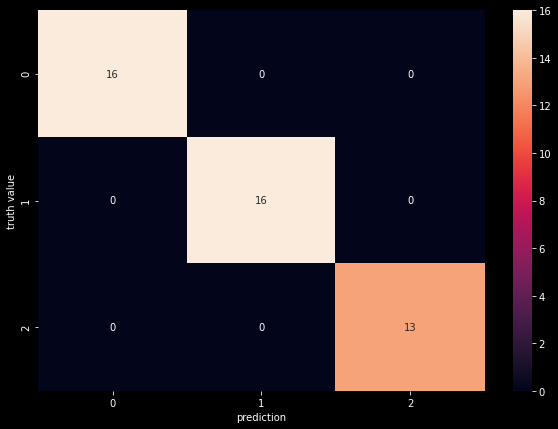

In [58]:
#needed module
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt 

#cm
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(lrmulti.predict(xte), yte), annot=True)
plt.xlabel("prediction")
plt.ylabel("truth value")

#classification report
print(classification_report(yte, lrmulti.predict(xte)))